In [1]:
#Import pandas, matplotlib.pyplot, numpy, seaborn, and scikit functions
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


In [2]:
#load in csv from data wrangling portion
cars2 = pd.read_csv("cars2.csv")

In [3]:
#view dataframe
cars2.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,Lx,Suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,Lx,Suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,Bmw,3 Series,328I Sulev,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29
4,2014,Bmw,6 Series Gran Coupe,650I,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


In [4]:
#investigate any inconsistencies in the car makes
cars2['make'].unique()

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes', 'Mitsubishi', 'Mazda', 'Mini', 'Land Rover',
       'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota', 'Subaru', 'Scion',
       'Porsche', 'Dodge', 'Fiat', 'Chrysler', 'Ferrari', 'Honda', 'Gmc',
       'Ram', 'Smart', 'Bentley', 'Pontiac', 'Saturn', 'Maserati',
       'Mercury', 'Hummer', 'Saab', 'Suzuki', 'Oldsmobile', 'Isuzu',
       'Geo', 'Rolls Royce', 'Daewoo', 'Plymouth', 'Tesla', 'Airstream',
       'Dot', 'Aston Martin', 'Fisker', 'Lamborghini', 'Lotus'],
      dtype=object)

In [5]:
#look at make and the average sale price
car_make_model_price_means = cars2.groupby('make')['sellingprice'].mean().round(2)
print(car_make_model_price_means)

make
Acura            13983.60
Airstream        71000.00
Aston Martin     54812.00
Audi             19910.83
Bentley          74367.67
Bmw              21474.03
Buick            10709.56
Cadillac         15072.47
Chevrolet        11939.20
Chrysler         11068.44
Daewoo             400.00
Dodge            11163.89
Dot                500.00
Ferrari         127210.53
Fiat             10367.49
Fisker           46461.11
Ford             13949.41
Geo                528.95
Gmc              16913.07
Honda            10905.41
Hummer           15269.49
Hyundai          11003.46
Infiniti         20417.46
Isuzu             1709.20
Jaguar           19782.52
Jeep             14952.74
Kia              11806.38
Lamborghini     112625.00
Land Rover       31330.81
Lexus            20213.99
Lincoln          16839.70
Lotus            40800.00
Maserati         44947.06
Mazda            10049.66
Mercedes         21532.23
Mercury           3907.27
Mini             12313.66
Mitsubishi        8185.24
Nissan 

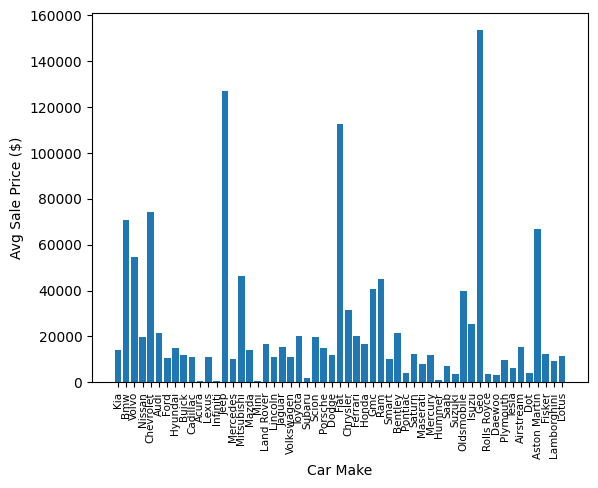

In [6]:
#plot as a subsequent figure
figsize=(10,15)
plt.bar(cars2['make'].unique(),car_make_model_price_means)
plt.xlabel('Car Make')
plt.xticks(rotation=90, fontsize = 7.5)
plt.ylabel('Avg Sale Price ($)')
plt.show()

In [7]:
#group seller means
car_seller_price_means = cars2.groupby('seller')['sellingprice'].mean().round(2).sort_values(ascending=False)
print(car_seller_price_means)

seller
phelps auto sales                           161000.00
financial services remarketing (bmw int)    153222.22
autolink sales llc                          134500.00
chings trading                              134000.00
carbiz solutions  inc.                      133000.00
                                              ...    
republic finance llc/pearl                     200.00
american red cross/lehigh valley               200.00
alberta truck & auto liquidators               200.00
beaverton honda                                200.00
titlemax/manning sc1                           150.00
Name: sellingprice, Length: 14261, dtype: float64


In [8]:
#investigate how many observations (car records) do not have any miles driven
no_miles = cars2[cars2['odometer']< 1]
no_miles.shape

(0, 16)

In [9]:
#look for any inconsistencies in models
cars2['model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'Xc70', 'X5', 'Sq5',
       'S5', 'Verano', 'Suburban', 'Elr', 'V60', 'X6', 'Ilx', 'K900',
       'Malibu', 'Rx 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       'Enclave', 'Tts', '4 Series', 'Silverado 2500Hd', 'Mdx',
       'Silverado 1500', 'Srx', 'G Coupe', 'G Sedan', 'Fx', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'Gs 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'Slk-Class', 'Es 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'Cx-9', 'Forte',
       'Compass', 'Jx', 'Rx 450H', 'Lr4', 'Mazda5', 'Range Rover Evoque',
       'Ls 460', 'Glk-Class', 'Sportage', 'Grand Cherokee', 'Mkx', 'Mkt',
     

In [10]:
#look at means of sale price by state
cars_avg_price_by_state = cars2.groupby('state')['sellingprice'].mean().round(2)
cars_avg_price_by_state

state
ab    11172.04
al     9142.31
az    11546.06
ca    14505.90
co    15877.80
fl    13877.44
ga    12918.77
hi    12190.82
il    14791.74
in    10715.57
la    10521.62
ma     6726.74
md     7410.31
mi    14886.22
mn    13708.19
mo    14466.19
ms    11244.13
nc     8660.96
ne    12572.96
nj    13609.10
nm     6291.81
ns    10213.11
nv    15097.77
ny    11374.54
oh    14406.62
ok     6918.06
on    17812.62
or    11558.48
pa    15976.30
pr     9410.77
qc    13292.97
sc    10326.17
tn    17009.74
tx    13209.67
ut    12065.63
va     8575.58
wa    13945.39
wi    14003.53
Name: sellingprice, dtype: float64

In [11]:
#create metrics centered around sale price
cars2['cost_per_miles_driven'] = cars2.sellingprice / cars2.odometer
cars2['cost_per_perceived_value'] = cars2.sellingprice / cars2.mmr

In [23]:
#find raw correlation between variables
cars2.corr(numeric_only=True)

,year,condition,odometer,mmr,sellingprice,cost_per_miles_driven,cost_per_perceived_value
year,1.000000,0.349518,-0.772484,0.596628,0.586498,-0.006968,-0.026672
condition,0.349518,1.000000,-0.325772,0.288965,0.329335,-0.029775,0.115396
odometer,-0.772484,-0.325772,1.000000,-0.588042,-0.582344,-0.040653,0.056199
mmr,0.596628,0.288965,-0.588042,1.000000,0.983635,0.014973,-0.017856
sellingprice,0.586498,0.329335,-0.582344,0.983635,1.000000,0.002236,0.050105
cost_per_miles_driven,-0.006968,-0.029775,-0.040653,0.014973,0.002236,1.000000,-0.020739
cost_per_perceived_value,-0.026672,0.115396,0.056199,-0.017856,0.050105,-0.020739,1.000000


<Axes: >

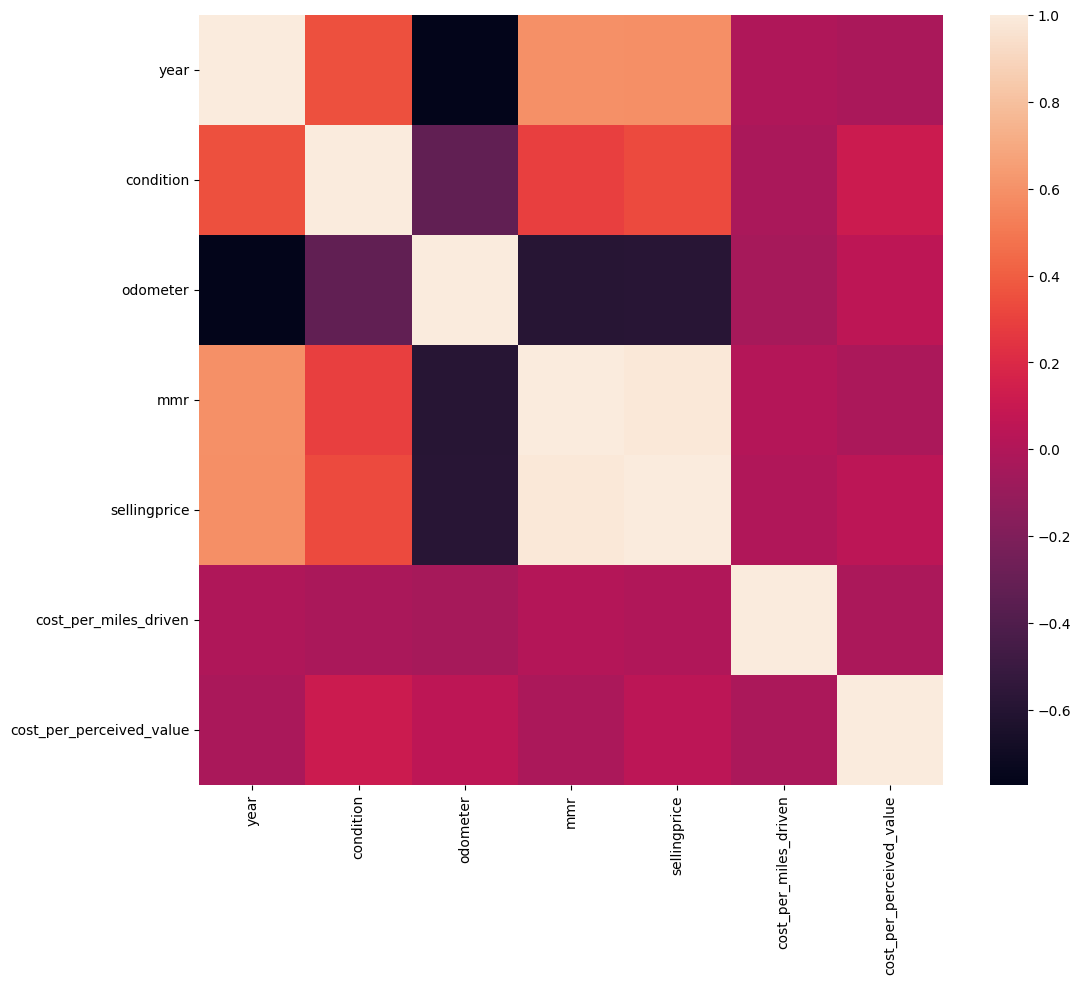

In [12]:
#plot and determine correlation between numeric fields
plt.subplots(figsize=(12,10))

sns.heatmap(cars2.corr(numeric_only = True))

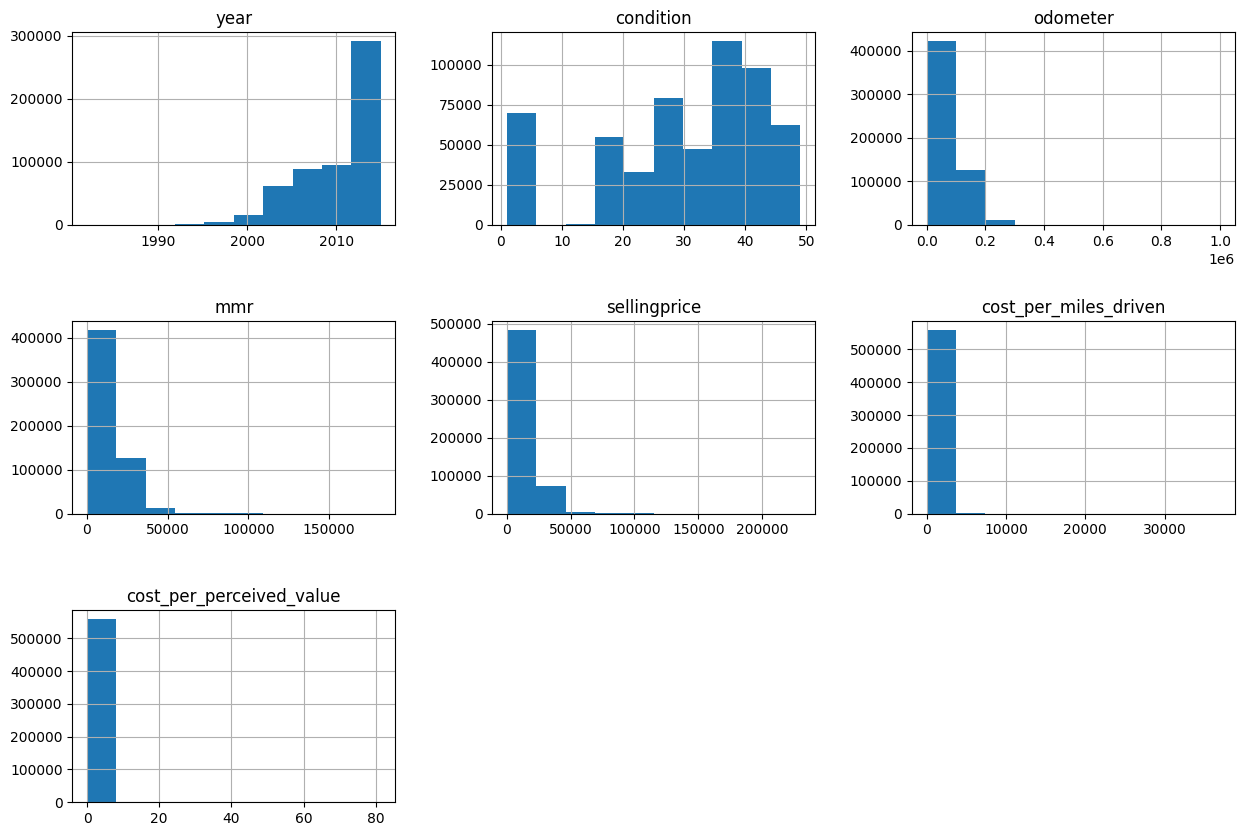

In [17]:
#majority of cars being sold are within 2013-2015, condition is variable, most cars cost less than $50K
cars2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

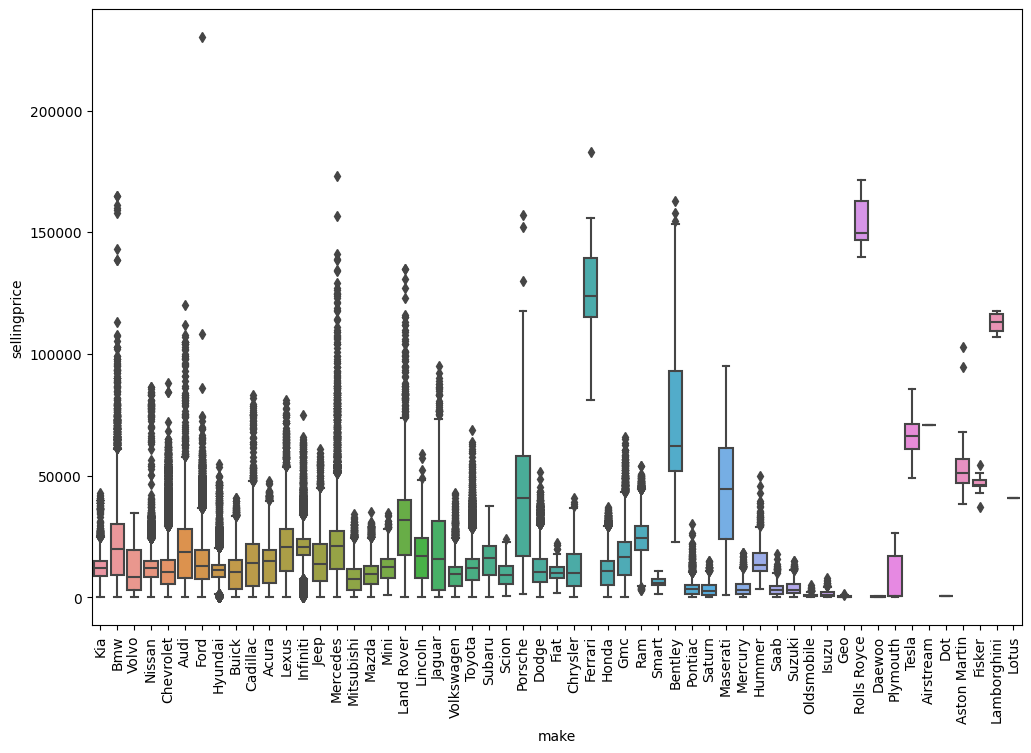

In [22]:
#further understand dispersion of selling price data, make is presumptive high feature 
plt.subplots(figsize=(12, 8))
sns.boxplot(x='make', y='sellingprice', data=cars2)
plt.xticks(rotation='vertical');

<Axes: xlabel='mmr', ylabel='sellingprice'>

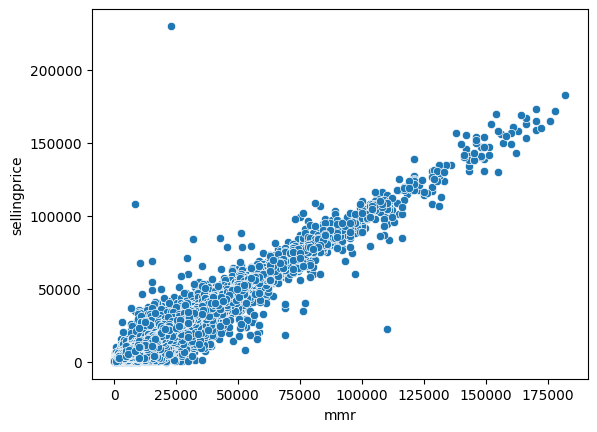

In [21]:
#high correlation between mmr and selling price indicate a line of best fit
sns.scatterplot(x='mmr',y='sellingprice',data=cars2)